In [183]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [170]:
def calculate_correlation(sp500_data, sentiment_data):
    """
    Calculate the Pearson correlation coefficient between S&P500 data and sentiment.

    Parameters:
    sp500_data (list or np.array): Minute-by-minute S&P500 data.
    sentiment_data (list or np.array): Minute-by-minute sentiment data.

    Returns:
    float: The Pearson correlation coefficient.
    """
    correlation, _ = pearsonr(sp500_data, sentiment_data)
    return correlation

In [171]:
def plot_scatter(sp500_data, sentiment_data):
    """
    Create a scatter plot to visualize the relationship between S&P500 data and sentiment,
    with different colors for each dataset.

    Parameters:
    sp500_data (list or np.array): Minute-by-minute S&P500 data.
    sentiment_data (list or np.array): Minute-by-minute sentiment data.
    """
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for S&P500 data
    plt.scatter(range(len(sp500_data)), sp500_data, color='blue', alpha=0.5, label='S&P500')
    
    # Scatter plot for sentiment data
    plt.scatter(range(len(sentiment_data)), sentiment_data, color='red', alpha=0.5, label='Sentiment')
    
    plt.title('Scatter Plot of S&P500 and Sentiment Over Time')
    plt.xlabel('Time (Minutes)')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

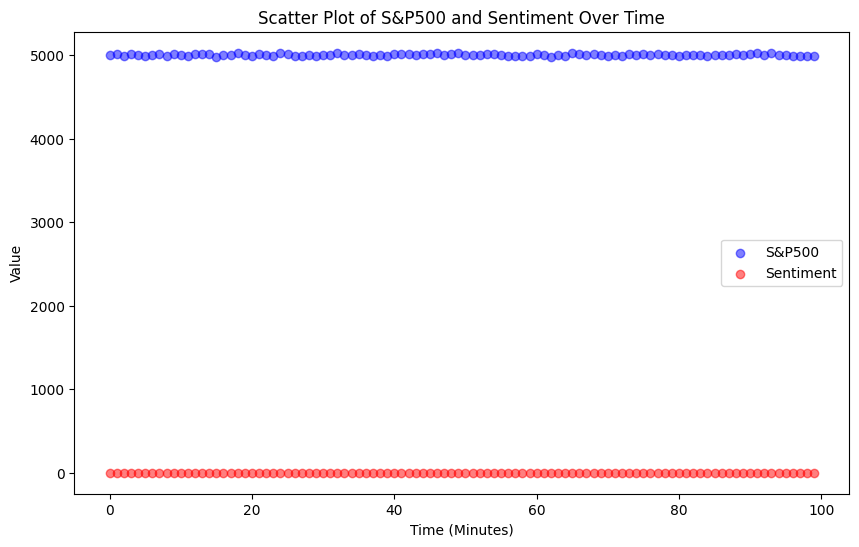

np.float64(0.05059446580299455)

In [172]:
# EXAMPLE

sp500_data = np.random.randn(100) * 10 + 5000
sentiment_data = np.random.uniform(-1, 1, 100)  # Replace with your sentiment data
plot_scatter(sp500_data, sentiment_data)
calculate_correlation(sp500_data, sentiment_data)

In [173]:
# Min-Max Scaling rescales both datasets to a range between 0 and 1, 
# making it easier to compare them on the same scale. 
# This method is useful if you want to preserve the original distribution.

def scale_data_minmax(sp500_data, sentiment_data):
    scaler = MinMaxScaler(feature_range=(-1, 1))  # Scale between 0 and 1
    
    # Reshaping the data to be 2D (required for the scaler)
    sp500_data_scaled = scaler.fit_transform(sp500_data.reshape(-1, 1))
    sentiment_data_scaled = scaler.fit_transform(sentiment_data.reshape(-1, 1))
    
    return sp500_data_scaled.flatten(), sentiment_data_scaled.flatten()

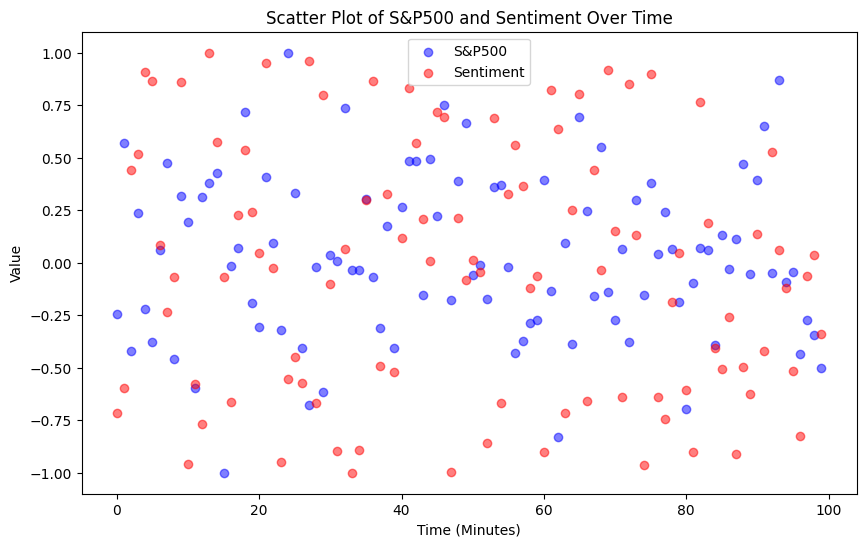

np.float64(0.05059446580299452)

In [174]:
# EXAMPLE

# Scaling both datasets
sp500_scaled, sentiment_scaled = scale_data_minmax(sp500_data, sentiment_data)

# Plotting the scaled data
plot_scatter(sp500_scaled, sentiment_scaled)
calculate_correlation(sp500_scaled, sentiment_scaled)

In [191]:
def rolling_correlation(market_data, sentiment, window=5):
    """
    Calculate the rolling correlation between two time series (S&P 500 and sentiment).

    !!! BEFORE APPLYING THE FUNCTION ENSURE THE DATAFRAME IS SORTED BY TIMESTAMP !!!

    Parameters:
    market_data: DataFrame's column containing 'sp500' prices column (should be a Series)
    sentiment: minute by minute sentiment for one specific speech (should be a Series)
    window (int): The size of the rolling window for correlation calculation.
    
    Returns:
    pandas.Series: Rolling correlation between 'sp500' and 'sentiment'.
    """
    
    # Ensure the indexes align (if necessary, adjust timestamps)
    # Calculate the rolling correlation between 'sp500' and 'sentiment'
    rolling_corr = market_data.rolling(window=window).corr(sentiment)
    
    # We extract only the correlation values by indexing the multi-level index (optional)
    # rolling_corr_values = rolling_corr.xs(key=sentiment.name, level=1)
    
    # Returning only the rolling correlation values for each window
    # Simplified version: The rolling correlation object already holds the values
    return rolling_corr


In [192]:
# Example data (replace with your actual time series)
sp500_data = np.array([4000, 4010, 3995, 4005, 4020, 4015])
sentiment_data = np.array([0.1, 0.2, -0.3, 0.4, -0.5, 0.6])

# Create timestamps for data
timestamps = pd.date_range('2024-01-01', periods=6, freq='T')

# Create pandas Series
sp500_series = pd.Series(sp500_data, index=timestamps, name='sp500')
sentiment_series = pd.Series(sentiment_data, index=timestamps, name='sentiment')

# Call the rolling_correlation function
result = rolling_correlation(sp500_series, sentiment_series, window=3)

# Print the result
print(result)

2024-01-01 00:00:00         NaN
2024-01-01 00:01:00         NaN
2024-01-01 00:02:00    0.866025
2024-01-01 00:03:00    0.817057
2024-01-01 00:04:00   -0.322317
2024-01-01 00:05:00   -0.633113
Freq: min, dtype: float64


C:\Users\fabar\AppData\Local\Temp\ipykernel_4036\408048259.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range('2024-01-01', periods=6, freq='T')
